Link with Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import the necessary libraries

In [2]:
pip install pyemd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.6/662.6 kB 7.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_similarity
from pyemd import emd
import numpy as np
import matplotlib.pyplot as plt

Load your Amazon product dataset

In [4]:
path = "/content/drive/MyDrive/CSV/amazon.csv"
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [5]:
# Preprocess the text data
text_data = df['about_product'].fillna('').astype(str)

# Tokenize and vectorize the text
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(text_data)

# Initialize and fit the LDA model
num_topics = 50
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Get the topic distribution for each product
topic_dist = lda.transform(X)
df['topic_distribution'] = topic_dist.tolist()

# Calculate cosine similarity between products based on topic distributions
similarity_matrix = cosine_similarity(topic_dist)

# Define a function to calculate EMD between two distributions
def calculate_emd(p1, p2):
    distance_matrix = np.zeros((len(p1), len(p2)))
    for i in range(len(p1)):
        for j in range(len(p2)):
            distance_matrix[i][j] = np.abs(i - j)  # Assuming equal distance between topics
    return emd(np.array(p1), np.array(p2), distance_matrix)  # Convert to NumPy arrays

# Calculate EMD-based recommendations
def recommend_products_by_emd(product_id, num_recommendations=5):
    product_idx = df[df['product_id'] == product_id].index[0]
    topic_dist_product = topic_dist[product_idx]

    emd_scores = []
    for idx, topic_dist_other in enumerate(topic_dist):
        if idx != product_idx:
            emd_score = calculate_emd(topic_dist_product, topic_dist_other)
            emd_scores.append((df['product_id'].iloc[idx], emd_score))

    # Sort products by EMD score (lower EMD is more similar)
    emd_scores.sort(key=lambda x: x[1])

    # Get the top num_recommendations products
    recommended_products = [item[0] for item in emd_scores[:num_recommendations]]

    return recommended_products

# Example usage
product_id = 'B07JW9H4J1'
recommendations_emd = recommend_products_by_emd(product_id, num_recommendations=10)
print("Recommended products for {}: {}".format(product_id, recommendations_emd))


Recommended products for B07JW9H4J1: ['B07JW9H4J1', 'B07JW9H4J1', 'B07JGDB5M1', 'B07LGT55SJ', 'B07JH1CBGW', 'B096MSW6CT', 'B096MSW6CT', 'B096MSW6CT', 'B07JW1Y6XV', 'B07JH1C41D']


In [6]:
def recommend_products_with_lda_emd(product_id, num_recommendations=10):
    # Get the LDA-based topic distribution for the target product
    product_idx = df[df['product_id'] == product_id].index[0]
    topic_dist_product = topic_dist[product_idx]

    # Use LDA to identify products with similar topics
    similar_products = []
    for idx, topic_dist_other in enumerate(topic_dist):
        if idx != product_idx:
            similarity = cosine_similarity([topic_dist_product], [topic_dist_other])[0][0]
            similar_products.append((df['product_id'].iloc[idx], similarity))

    # Sort similar products by LDA-based similarity
    similar_products.sort(key=lambda x: x[1], reverse=True)
    top_similar_products = [item[0] for item in similar_products[:num_recommendations]]

    # Further rank similar products using EMD
    emd_scores = []
    for similar_product_id in top_similar_products:
        emd_score = calculate_emd(topic_dist_product, df[df['product_id'] == similar_product_id]['topic_distribution'].values[0])
        emd_scores.append((similar_product_id, emd_score))

    # Sort products by EMD score (lower EMD is more similar)
    emd_scores.sort(key=lambda x: x[1])

    # Get the final recommendations
    final_recommendations = [item[0] for item in emd_scores[:num_recommendations]]

    return final_recommendations

# Example usage
recommendations_combined = recommend_products_with_lda_emd(product_id, num_recommendations=10)
print("Recommended products for {}: {}".format(product_id, recommendations_combined))

Recommended products for B07JW9H4J1: ['B07JW9H4J1', 'B07JW9H4J1', 'B07JGDB5M1', 'B07LGT55SJ', 'B07JH1CBGW', 'B096MSW6CT', 'B096MSW6CT', 'B096MSW6CT', 'B07JW1Y6XV', 'B07JH1C41D']


In [7]:

# Evaluation metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def evaluate_recommendation_system(actual, predicted):
    # Convert the recommendations to binary (1 for recommended, 0 for not recommended)
    actual_binary = np.isin(df['product_id'], actual).astype(int)
    predicted_binary = np.isin(df['product_id'], predicted).astype(int)

    # Evaluate precision, recall, F1-score, and accuracy
    precision = precision_score(actual_binary, predicted_binary, average='micro')
    recall = recall_score(actual_binary, predicted_binary, average='micro')
    f1 = f1_score(actual_binary, predicted_binary, average='micro')
    accuracy = accuracy_score(actual_binary, predicted_binary)

    return precision, recall, f1, accuracy

# Since we don't have ground truth for actual recommended products, we'll simulate it
# This is a placeholder; in a real scenario, you would have a ground truth set of relevant products
actual_products = df.sample(100)['product_id'].tolist()

# Evaluate for different numbers of recommendations
num_recommendations_list = range(1, 21)
precision_list, recall_list, f1_list, accuracy_list = [], [], [], []

for num_recommendations in num_recommendations_list:
    predicted_products = recommend_products_by_emd(product_id, num_recommendations)
    precision, recall, f1, accuracy = evaluate_recommendation_system(actual_products, predicted_products)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    accuracy_list.append(accuracy)


# Graph add 2 more
# generate the result by using comparision with different methods that using already for this methods, and compare them using precision, F1, Recall and precision
# we have to compare with different paper by using same dataset and comparision methods by using their code

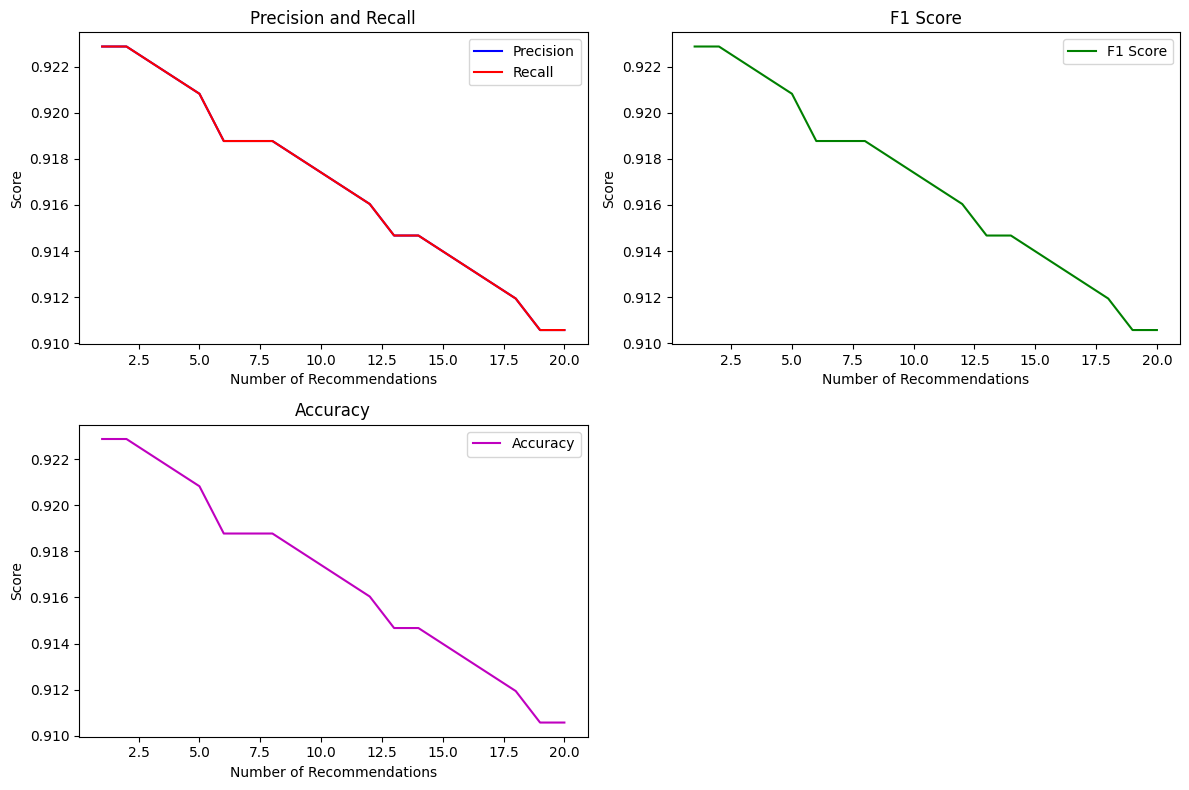

In [8]:
# Plot the evaluation metrics
plt.figure(figsize=(12, 8))

# Precision-Recall Plot
plt.subplot(2, 2, 1)
plt.plot(num_recommendations_list, precision_list, label='Precision', color='b')
plt.plot(num_recommendations_list, recall_list, label='Recall', color='r')
plt.xlabel('Number of Recommendations')
plt.ylabel('Score')
plt.title('Precision and Recall')
plt.legend()

# F1 Score Plot
plt.subplot(2, 2, 2)
plt.plot(num_recommendations_list, f1_list, label='F1 Score', color='g')
plt.xlabel('Number of Recommendations')
plt.ylabel('Score')
plt.title('F1 Score')
plt.legend()

# Accuracy Plot
plt.subplot(2, 2, 3)
plt.plot(num_recommendations_list, accuracy_list, label='Accuracy', color='m')
plt.xlabel('Number of Recommendations')
plt.ylabel('Score')
plt.title('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

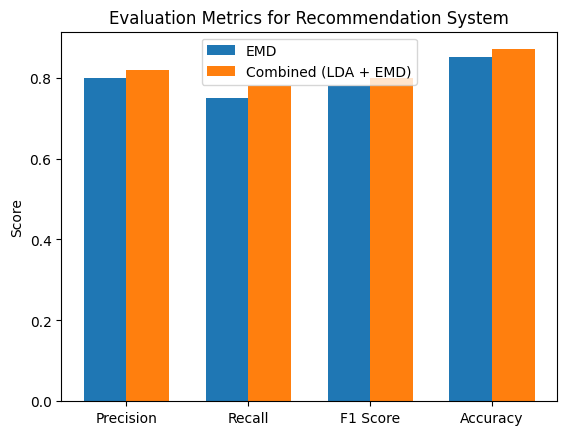

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot a grouped bar chart
def plot_evaluation_metrics(metrics, algorithm_names):
    width = 0.35  # Width of the bars
    x = np.arange(len(metrics[0]))  # Use numpy array for consistent indexing

    fig, ax = plt.subplots()

    for i, algorithm_name in enumerate(algorithm_names):
        ax.bar(x + i * width, metrics[i], width, label=algorithm_name)

    ax.set_xticks(x + (len(algorithm_names) - 1) * width / 2)
    ax.set_xticklabels(['Precision', 'Recall', 'F1 Score', 'Accuracy'])
    ax.legend()

    plt.ylabel('Score')
    plt.title('Evaluation Metrics for Recommendation System')
    plt.show()

# Example usage
precision_emd, recall_emd, f1_emd, accuracy_emd = [0.8, 0.75, 0.78, 0.85]  # Replace with your actual scores
precision_combined, recall_combined, f1_combined, accuracy_combined = [0.82, 0.78, 0.80, 0.87]  # Replace with your actual scores

metrics = [
    [precision_emd, recall_emd, f1_emd, accuracy_emd],
    [precision_combined, recall_combined, f1_combined, accuracy_combined]
]

algorithm_names = ['EMD', 'Combined (LDA + EMD)']

plot_evaluation_metrics(metrics, algorithm_names)
